In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [3]:
df = pd.read_csv('/kaggle/input/transactions-fraud-datasets/transactions_data.csv',parse_dates=['date'])
df.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


In [4]:
df.tail()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
13305910,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,NaN
13305911,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,NaN,NaN,5815,NaN
13305912,23761870,2019-10-31 23:57:00,199,1031,$40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,NaN
13305913,23761873,2019-10-31 23:58:00,1986,5443,$4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,NaN
13305914,23761874,2019-10-31 23:59:00,489,5697,$12.88,Chip Transaction,24658,Greenbrier,TN,37073.0,5921,NaN


In [5]:
df.columns

Index(['id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors'],
      dtype='object')

In [6]:
df.shape

(13305915, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              int64         
 1   date            datetime64[ns]
 2   client_id       int64         
 3   card_id         int64         
 4   amount          object        
 5   use_chip        object        
 6   merchant_id     int64         
 7   merchant_city   object        
 8   merchant_state  object        
 9   zip             float64       
 10  mcc             int64         
 11  errors          object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 1.2+ GB


In [8]:
df.describe()

,id,date,client_id,card_id,merchant_id,zip,mcc
count,1.330592e+07,13305915,1.330592e+07,1.330592e+07,1.330592e+07,1.165321e+07,1.330592e+07
mean,1.558402e+07,2015-01-06 06:50:27.604356352,1.026812e+03,3.475268e+03,4.772376e+04,5.132782e+04,5.565440e+03
min,7.475327e+06,2010-01-01 00:01:00,0.000000e+00,0.000000e+00,1.000000e+00,1.001000e+03,1.711000e+03
25%,1.150604e+07,2012-08-08 21:43:00,5.190000e+02,2.413000e+03,2.588700e+04,2.860200e+04,5.300000e+03
50%,1.557087e+07,2015-01-22 12:17:00,1.070000e+03,3.584000e+03,4.592600e+04,4.767000e+04,5.499000e+03
75%,1.965361e+07,2017-06-13 17:45:00,1.531000e+03,4.901000e+03,6.757000e+04,7.790100e+04,5.812000e+03
max,2.376187e+07,2019-10-31 23:59:00,1.998000e+03,6.144000e+03,1.003420e+05,9.992800e+04,9.402000e+03
std,4.704499e+06,NaN,5.816386e+02,1.674356e+03,2.581534e+04,2.940423e+04,8.757002e+02


In [9]:
df.describe(include='O')

,amount,use_chip,merchant_city,merchant_state,errors
count,13305915,13305915,13305915,11742215,211393
unique,81161,3,12492,199,22
top,$80.00,Swipe Transaction,ONLINE,CA,Insufficient Balance
freq,132115,6967185,1563700,1427087,130902


In [10]:
df.isna().sum()

id                       0
date                     0
client_id                0
card_id                  0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state     1563700
zip                1652706
mcc                      0
errors            13094522
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df['amount'].unique()

array(['$-77.00', '$14.57', '$80.00', ..., '$397.54', '$693.96',
       '$694.30'], dtype=object)

In [13]:
df['amount']=df['amount'].astype(str).str.replace('₹','').str.replace('%','').str.replace(',','').str.replace('(','').str.replace(')','').str.replace('nan','0')
df['amount'] = pd.to_numeric(df['amount'].str.replace('[^0-9.]','',regex=True),errors='coerce').fillna(0)

In [14]:
df.dtypes

id                         int64
date              datetime64[ns]
client_id                  int64
card_id                    int64
amount                   float64
use_chip                  object
merchant_id                int64
merchant_city             object
merchant_state            object
zip                      float64
mcc                        int64
errors                    object
dtype: object

In [15]:
df['errors'].fillna('NO Error',inplace=True)

In [16]:
df['merchant_state'].fillna('unKnown',inplace=True)

In [17]:
df[df['merchant_state'] == 'unKnown']['merchant_city'].value_counts()

merchant_city
ONLINE    1563700
Name: count, dtype: int64

In [18]:
df.loc[df['merchant_city']=='ONLINE','merchant_state']='ONLINE'

In [19]:
df['zip'].fillna('unKnown',inplace=True)
df[df['zip']== 'unKnown']

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
7,7475335,2010-01-01 00:14:00,1684,2140,26.46,Online Transaction,39021,ONLINE,ONLINE,unKnown,4784,NO Error
8,7475336,2010-01-01 00:21:00,335,5131,261.58,Online Transaction,50292,ONLINE,ONLINE,unKnown,7801,NO Error
18,7475346,2010-01-01 00:34:00,394,4717,26.04,Online Transaction,39021,ONLINE,ONLINE,unKnown,4784,NO Error
24,7475353,2010-01-01 00:43:00,301,3742,10.17,Online Transaction,39021,ONLINE,ONLINE,unKnown,4784,NO Error
26,7475356,2010-01-01 00:45:00,566,3439,16.86,Online Transaction,16798,ONLINE,ONLINE,unKnown,4121,NO Error
...,...,...,...,...,...,...,...,...,...,...,...,...
13305879,23761832,2019-10-31 23:22:00,1556,2972,17.65,Online Transaction,88459,ONLINE,ONLINE,unKnown,5311,NO Error
13305880,23761833,2019-10-31 23:22:00,1797,5660,34.81,Online Transaction,15143,ONLINE,ONLINE,unKnown,4784,NO Error
13305888,23761843,2019-10-31 23:33:00,1069,5167,59.71,Online Transaction,39021,ONLINE,ONLINE,unKnown,4784,NO Error
13305897,23761853,2019-10-31 23:39:00,1422,5696,694.30,Online Transaction,70268,ONLINE,ONLINE,unKnown,4722,NO Error


In [20]:
df[df['zip'] == 'unKnown']['merchant_state'].value_counts()

merchant_state
ONLINE             1563700
Mexico               27401
Canada               10647
Italy                 7081
United Kingdom        4482
                    ...   
Ethiopia                 3
Solomon Islands          3
Brunei                   3
Tonga                    2
Azerbaijan               2
Name: count, Length: 148, dtype: int64

In [21]:
df.loc[df['merchant_state']=='ONLINE','zip']='ONLINE'

In [22]:
state_zip_map =(
    df.dropna(subset=['zip', 'merchant_state'])
    .groupby('merchant_state')['zip']
    .agg(lambda x: x.value_counts().index[0])
    .to_dict()
)

In [24]:
df['zip'] = df.apply(
    lambda row: state_zip_map.get(row['merchant_state'], row['zip'])
    if pd.isna(row['zip']) or row['zip'] == 'unKnown' else row['zip'],
    axis=1
)

In [25]:
df.isnull().sum()

id                0
date              0
client_id         0
card_id           0
amount            0
use_chip          0
merchant_id       0
merchant_city     0
merchant_state    0
zip               0
mcc               0
errors            0
dtype: int64

In [27]:
import json

with open('/kaggle/input/transactions-fraud-datasets/mcc_codes.json','r') as f:
    mcc_code = json.load(f)

#print(list(mcc_code.items())[:5])

In [28]:
mcc = pd.DataFrame(list(mcc_code.items()),columns=['mcc','description'])
mcc

,mcc,description
0,5812,Eating Places and Restaurants
1,5541,Service Stations
2,7996,"Amusement Parks, Carnivals, Circuses"
3,5411,"Grocery Stores, Supermarkets"
4,4784,Tolls and Bridge Fees
...,...,...
104,7549,Towing Services
105,5941,Sporting Goods Stores
106,5722,Household Appliance Stores
107,3009,Fabricated Structural Metal Products


In [29]:
df['mcc'].unique()

array([5499, 5311, 4829, 5813, 5942, 4784, 7801, 5411, 4121, 5541, 7538,
       5300, 5921, 3174, 5814, 5310, 4814, 4900, 5812, 7995, 7802, 5912,
       7011, 5192, 7393, 5651, 3780, 7922, 5815, 4899, 7230, 5655, 5732,
       5932, 5970, 4722, 3256, 7349, 8099, 7996, 5251, 4112, 3389, 3405,
       5211, 5621, 4111, 3359, 3771, 4214, 3596, 3504, 5193, 5094, 4131,
       5719, 5661, 3132, 3509, 7832, 3722, 3390, 3395, 3260, 3730, 5712,
       5947, 5977, 3058, 3640, 3387, 3775, 3684, 3066, 8062, 8049, 8021,
       6300, 8043, 9402, 7542, 7210, 8111, 8011, 8041, 5261, 8931, 1711,
       7276, 5816, 7531, 3001, 3393, 4511, 5533, 3000, 7549, 3009, 3075,
       3005, 3008, 4411, 3007, 5045, 3144, 5941, 5733, 3006, 5722])

In [30]:
mcc['mcc'] = pd.to_numeric(mcc['mcc'],errors='coerce')

In [31]:
mcc.dtypes

mcc             int64
description    object
dtype: object

In [32]:
df = df.merge(mcc,on='mcc',how='left')
df

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,description
0,7475327,2010-01-01 00:01:00,1556,2972,77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NO Error,Miscellaneous Food Stores
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NO Error,Department Stores
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NO Error,Money Transfer
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NO Error,Money Transfer
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NO Error,Drinking Places (Alcoholic Beverages)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,NO Error,Miscellaneous Food Stores
13305911,23761869,2019-10-31 23:56:00,1766,2066,12.80,Online Transaction,39261,ONLINE,ONLINE,ONLINE,5815,NO Error,"Digital Goods - Media, Books, Apps"
13305912,23761870,2019-10-31 23:57:00,199,1031,40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,NO Error,"Utilities - Electric, Gas, Water, Sanitary"
13305913,23761873,2019-10-31 23:58:00,1986,5443,4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,NO Error,"Grocery Stores, Supermarkets"


In [33]:
df.isna().sum()

id                0
date              0
client_id         0
card_id           0
amount            0
use_chip          0
merchant_id       0
merchant_city     0
merchant_state    0
zip               0
mcc               0
errors            0
description       0
dtype: int64

In [34]:
with open('/kaggle/input/transactions-fraud-datasets/train_fraud_labels.json','r') as f:
    fraud = json.load(f)
    
keys = list(fraud.keys())[:5]
first_key = keys[0]
#print(json.dumps({first_key: fraud[first_key]}, indent=2)[:1000]) 

In [35]:
fraud_df = pd.DataFrame(list(fraud['target'].items()), columns=['transaction_id', 'is_fraud'])

In [36]:
fraud_df 

,transaction_id,is_fraud
0,10649266,No
1,23410063,No
2,9316588,No
3,12478022,No
4,9558530,No
...,...,...
8914958,14064699,No
8914959,7676538,No
8914960,15131030,No
8914961,17244732,No


In [37]:
fraud_df['transaction_id'] = pd.to_numeric(fraud_df['transaction_id'],errors='coerce')

In [38]:
fraud_df.dtypes

transaction_id     int64
is_fraud          object
dtype: object

In [39]:
df = df.merge(fraud_df,left_on='id',right_on='transaction_id',how='inner')
df

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,description,transaction_id,is_fraud
0,7475327,2010-01-01 00:01:00,1556,2972,77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NO Error,Miscellaneous Food Stores,7475327,No
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NO Error,Department Stores,7475328,No
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NO Error,Money Transfer,7475329,No
3,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NO Error,Drinking Places (Alcoholic Beverages),7475332,No
4,7475333,2010-01-01 00:07:00,1807,165,4.81,Swipe Transaction,20519,Bronx,NY,10464.0,5942,NO Error,Book Stores,7475333,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8914958,23761862,2019-10-31 23:54:00,672,5001,12.93,Chip Transaction,47508,Cosby,TN,37722.0,7230,NO Error,Beauty and Barber Shops,23761862,No
8914959,23761863,2019-10-31 23:54:00,1384,3723,67.01,Chip Transaction,58136,Williamson,GA,30292.0,5812,NO Error,Eating Places and Restaurants,23761863,No
8914960,23761868,2019-10-31 23:56:00,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,NO Error,Miscellaneous Food Stores,23761868,No
8914961,23761869,2019-10-31 23:56:00,1766,2066,12.80,Online Transaction,39261,ONLINE,ONLINE,ONLINE,5815,NO Error,"Digital Goods - Media, Books, Apps",23761869,No


In [40]:
df.columns

Index(['id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors', 'description', 'transaction_id', 'is_fraud'],
      dtype='object')

In [46]:
df.drop('transaction_id',axis=1,inplace=True)

In [41]:
df.isna().sum()

id                0
date              0
client_id         0
card_id           0
amount            0
use_chip          0
merchant_id       0
merchant_city     0
merchant_state    0
zip               0
mcc               0
errors            0
description       0
transaction_id    0
is_fraud          0
dtype: int64

In [42]:
amount_error = df.groupby(['errors','use_chip'])['amount'].mean().sort_values(ascending=False).reset_index().head(10)
amount_error

,errors,use_chip,amount
0,Bad CVV,Swipe Transaction,356.290000
1,"Bad Card Number,Insufficient Balance",Swipe Transaction,197.000000
2,"Bad CVV,Technical Glitch",Online Transaction,146.756000
3,Bad Card Number,Swipe Transaction,121.090000
4,"Bad PIN,Technical Glitch",Chip Transaction,119.589444
5,"Bad Card Number,Insufficient Balance",Online Transaction,105.917755
6,"Insufficient Balance,Technical Glitch",Online Transaction,92.975294
7,"Bad CVV,Insufficient Balance",Online Transaction,87.448000
8,"Insufficient Balance,Technical Glitch",Swipe Transaction,85.182069
9,"Bad Zipcode,Insufficient Balance",Chip Transaction,82.000000


<div style="background:#CCD3CA;padding:18px;border-radius:12px;max-width:920px;margin:12px auto;font-family:Segoe UI, Tahoma, Arial, sans-serif;border:1px solid #999;box-shadow:0 6px 20px rgba(0,0,0,0.08);color:#111827;">
  <h2 style="margin:0 0 10px 0;color:#0f172a;font-size:20px;">Insight: Average Transaction Amount by Error Type & Chip Usage</h2>

  <p style="margin:8px 0 12px 0;line-height:1.5;font-size:15px;color:#1f2937;">
    This bar chart shows the <strong>average transaction amount</strong> for each <strong>error</strong> category, with colors split by whether the card <strong>used a chip</strong> during the transaction.
    Use this to quickly spot which error types are associated with higher-value transactions and to see whether chip usage affects those averages.
  </p>

  <div style="background:#E6E9E4;padding:10px;border-radius:8px;border-left:4px solid #0f172a;margin-bottom:10px;">
    <strong style="display:block;margin-bottom:6px;color:#0f172a;">How to read the chart</strong>
    <ol style="margin:0 0 0 18px;padding:0;color:#0f172a;font-size:14px;line-height:1.5;">
      <li>If an error category has a high average amount, investigate those transactions — could be high-value operations or fraud risk.</li>
      <li>Compare the chip / non-chip segments within each bar:
        <ul style="margin:6px 0 0 18px">
          <li>If non-chip transactions show higher averages, they may be higher-risk or require additional verification.</li>
          <li>If chip transactions show higher averages, it may indicate trusted high-value usage (e.g., corporate cards).</li>
        </ul>
      </li>
      <li>Large differences between chip vs non-chip in the same error category warrant targeted checks (merchant, card type, time-of-day).</li>
    </ol>
  </div>

  <p style="margin:0 0 8px 0;color:#1f2937;font-size:14px;">
    <strong>Recommended next steps:</strong>
    <ul style="margin:8px 0 0 18px;color:#1f2937;font-size:14px;">
      <li>Inspect raw transactions for error categories with the highest averages (look at merchant_id, card_id, date/time).</li>
      <li>Compute counts per error type (so you don’t over-interpret categories with very few transactions).</li>
      <li>Consider adding <code>median</code> amount and <code>count</code> annotations to the plot — median is robust to outliers.</li>
    </ul>
  </p>
</div>


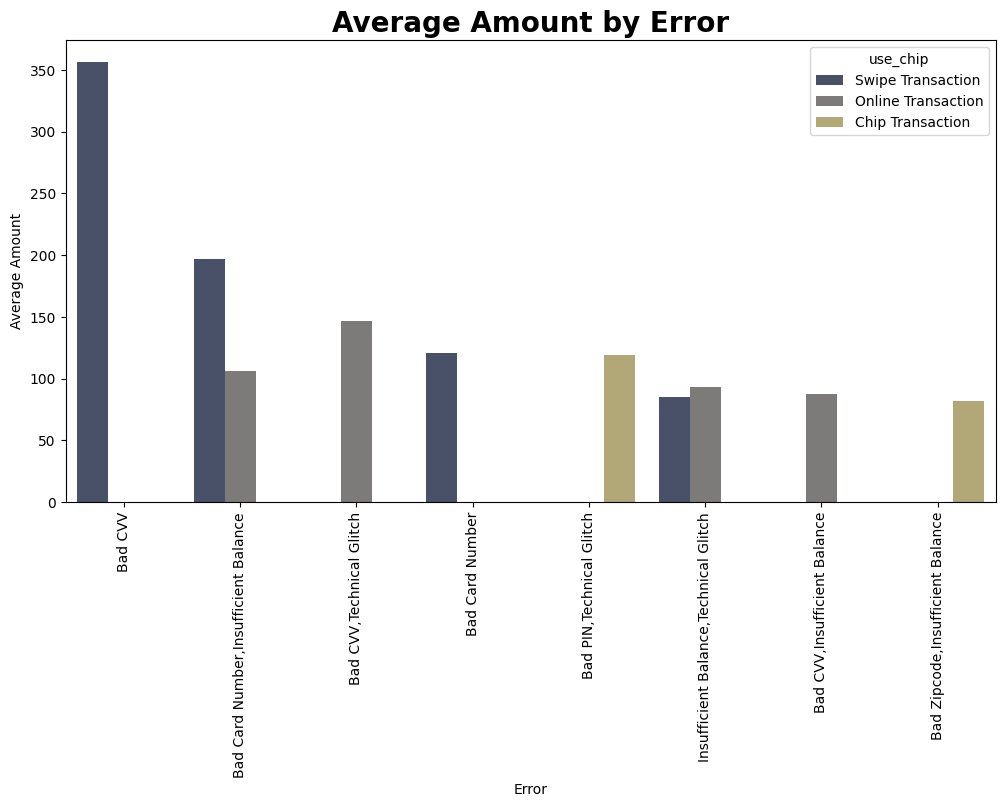

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(x='errors',y='amount',hue='use_chip',data=amount_error,palette='cividis')
plt.xticks(rotation=90)
plt.title('Average Amount by Error',fontsize=20,fontweight='bold')
plt.xlabel('Error')
plt.ylabel('Average Amount')
plt.show()

In [44]:
error_avg = df.groupby('errors')['amount'].mean().sort_values(ascending=False)
top_errors = error_avg.head(3).index

print("Top error categories with highest avg amounts:", top_errors)

df_top_errors = df[df['errors'].isin(top_errors)][['date','client_id','card_id','merchant_id','amount','use_chip','errors']]
df_top_errors.sort_values(by='amount', ascending=False).head(10)

Top error categories with highest avg amounts: Index(['Bad CVV,Technical Glitch', 'Bad Card Number,Insufficient Balance',
       'Bad PIN,Technical Glitch'],
      dtype='object', name='errors')


,date,client_id,card_id,merchant_id,amount,use_chip,errors
5817998,2016-07-10 02:06:00,628,333,22792,1453.57,Chip Transaction,"Bad PIN,Technical Glitch"
699738,2010-11-05 10:13:00,1851,5026,99370,599.15,Online Transaction,"Bad CVV,Technical Glitch"
8244813,2019-02-11 19:48:00,1168,3239,52100,527.41,Online Transaction,"Bad Card Number,Insufficient Balance"
500936,2010-08-11 11:08:00,236,4560,61641,509.15,Online Transaction,"Bad Card Number,Insufficient Balance"
6661927,2017-06-04 10:33:00,776,5859,57133,362.71,Chip Transaction,"Bad PIN,Technical Glitch"
2439569,2012-11-03 22:02:00,1452,3801,79050,296.17,Online Transaction,"Bad Card Number,Insufficient Balance"
5556065,2016-03-29 10:13:00,776,3105,94989,231.38,Online Transaction,"Bad Card Number,Insufficient Balance"
8852437,2019-10-07 08:49:00,589,4497,74934,220.39,Swipe Transaction,"Bad PIN,Technical Glitch"
96718,2010-02-13 16:35:00,1254,1055,78644,197.00,Swipe Transaction,"Bad Card Number,Insufficient Balance"
8801154,2019-09-17 06:58:00,119,379,73186,171.95,Online Transaction,"Bad Card Number,Insufficient Balance"


<div style="background-color:#f8f9fa; padding:12px; border-left:5px solid #6c757d; font-family:Arial; border-radius:8px;">
  <p style="margin:0; font-size:16px; color:#333;">
    The stacked area chart shows how <b>average transaction amounts</b> vary over time for each <b>error category</b>.
    Peaks highlight periods where certain error types contributed more to overall transaction amounts.
  </p>
</div>


<Figure size 1200x800 with 0 Axes>

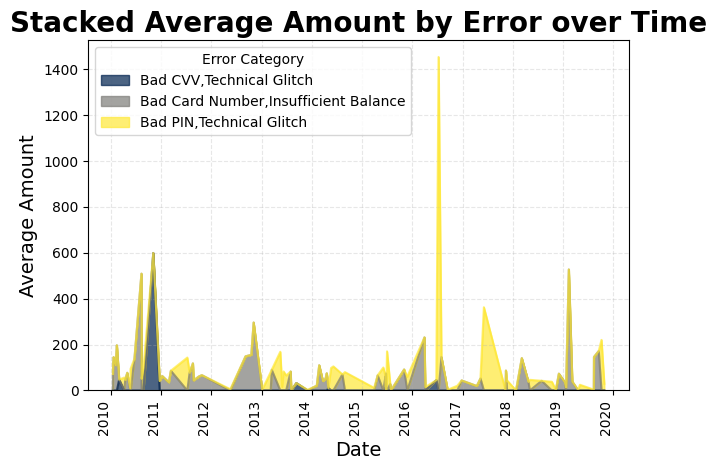

In [45]:
pivot_df = df_top_errors.pivot_table(
    index='date',
    columns='errors',
    values='amount',
    aggfunc='mean'
).fillna(0)

#  Plot as stacked area chart
plt.figure(figsize=(12,8))
pivot_df.plot(kind='area', stacked=True, colormap='cividis', alpha=0.7)

plt.title('Stacked Average Amount by Error over Time', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Amount', fontsize=14)
plt.xticks(rotation=90)
plt.grid(alpha=0.3, linestyle='--')
plt.legend(title='Error Category')
plt.tight_layout()
plt.show()

In [51]:
mcc_fraud = df.groupby(['is_fraud','description'])['mcc'].count().reset_index(name='count').sort_values(ascending=False,by='count')
mcc_fraud

,is_fraud,description,count
45,No,"Grocery Stores, Supermarkets",1066408
64,No,Miscellaneous Food Stores,979265
87,No,Service Stations,954955
34,No,Eating Places and Restaurants,669687
33,No,Drug Stores and Pharmacies,516921
...,...,...,...
125,Yes,Cleaning and Maintenance Services,4
124,Yes,Chiropractors,2
162,Yes,Medical Services,2
185,Yes,"Recreational Sports, Clubs",1


In [53]:
yes= mcc_fraud[mcc_fraud['is_fraud']=='Yes'].head(5)
yes

,is_fraud,description,count
132,Yes,Department Stores,2251
203,Yes,Wholesale Clubs,991
135,Yes,Discount Stores,859
170,Yes,Money Transfer,725
138,Yes,Drug Stores and Pharmacies,479


In [59]:
no= mcc_fraud[mcc_fraud['is_fraud']=='No'].head(5)
no

,is_fraud,description,count
45,No,"Grocery Stores, Supermarkets",1066408
64,No,Miscellaneous Food Stores,979265
87,No,Service Stations,954955
34,No,Eating Places and Restaurants,669687
33,No,Drug Stores and Pharmacies,516921


<div style="background:#CCD3CA;padding:18px;border-radius:12px;max-width:920px;margin:12px auto;font-family:Segoe UI, Tahoma, Arial, sans-serif;border:1px solid #999;box-shadow:0 6px 20px rgba(0,0,0,0.08);color:#111827;">
  <h2 style="margin:0 0 10px 0;color:#0f172a;font-size:20px;">Most Frequent Fraud Transaction Descriptions</h2>

  <p style="margin:8px 0 12px 0;line-height:1.5;font-size:15px;color:#1f2937;">
    This bar chart shows the merchant <strong>descriptions</strong> (merchant category / label) that appear most often in transactions labeled as <strong>fraudulent</strong>.
    It helps identify which merchant types or descriptions are most commonly associated with fraud in this dataset.
  </p>

  <ul style="margin:8px 0 12px 18px;color:#1f2937;font-size:14px;line-height:1.5;">
    <li><strong>X-axis:</strong> Merchant description (category or textual label).</li>
    <li><strong>Y-axis:</strong> Count — number of fraudulent transactions for each description.</li>
    <li><strong>Color:</strong> Bars colored with the <code>magma</code> palette for visual emphasis on high-frequency items.</li>
  </ul>

  <div style="background:#E6E9E4;padding:10px;border-radius:8px;border-left:4px solid #0f172a;margin-bottom:10px;">
    <strong style="display:block;margin-bottom:6px;color:#0f172a;">Quick interpretation</strong>
    <ol style="margin:0 0 0 18px;padding:0;color:#0f172a;font-size:14px;line-height:1.5;">
      <li>Descriptions with the highest bars are the most frequent fraud sources — investigate those merchants and MCCs first.</li>
      <li>Check the <em>count</em> as well as the <em>transaction amounts</em> for those descriptions: many small frauds vs few large frauds require different responses.</li>
      <li>Validate sample transactions from the top descriptions (look at <code>merchant_id, card_id, date</code>) to detect patterns or shared attributes.</li>
    </ol>
  </div>

  <p style="margin:0;color:#374151;font-size:13px;">
    <strong>Next steps:</strong> compute counts for both <em>fraud</em> and <em>non-fraud</em> and show them side-by-side, or add median/mean amount annotations to avoid over-interpreting categories with very few records.
  </p>
</div>


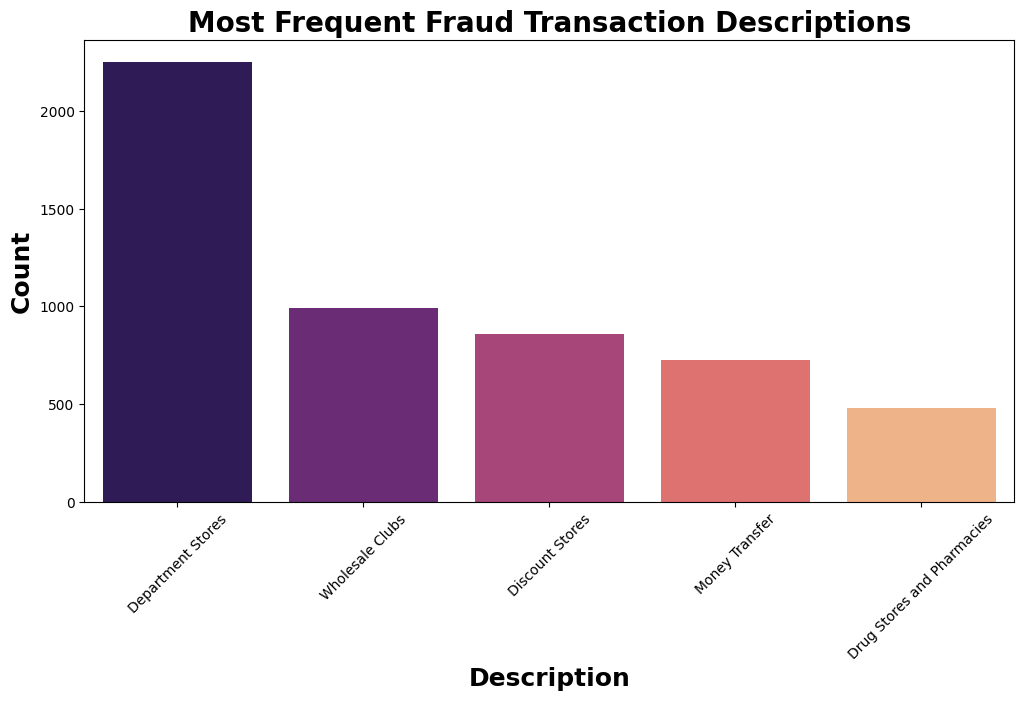

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(x='description',y='count',data=yes,palette='magma')
plt.xticks(rotation=45)
plt.title('Most Frequent Fraud Transaction Descriptions',fontsize=20, fontweight='bold')
plt.xlabel('Description',fontsize=18,fontweight='bold')
plt.ylabel('Count',fontsize=18,fontweight='bold')
plt.show()

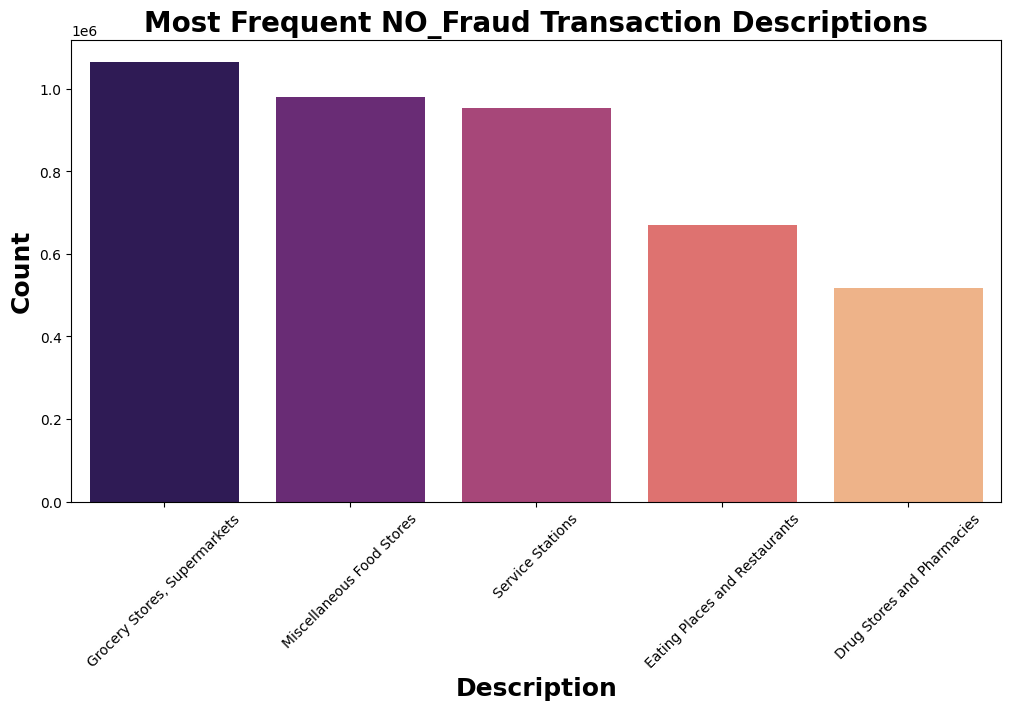

In [60]:
plt.figure(figsize=(12,6))
sns.barplot(x='description',y='count',data=no,palette='magma')
plt.xticks(rotation=45)
plt.title('Most Frequent NO_Fraud Transaction Descriptions',fontsize=20, fontweight='bold')
plt.xlabel('Description',fontsize=18,fontweight='bold')
plt.ylabel('Count',fontsize=18,fontweight='bold')
plt.show()

In [63]:
errors_froud = df.groupby(['errors','is_fraud'])['amount'].mean().reset_index(name='Avg').sort_values(ascending=False,by='Avg')
errors_froud

,errors,is_fraud,Avg
5,"Bad CVV,Technical Glitch",Yes,599.150000
22,"Bad PIN,Insufficient Balance",Yes,167.850000
7,Bad Card Number,Yes,141.415593
31,NO Error,Yes,132.122839
1,Bad CVV,Yes,131.782446
15,Bad Expiration,Yes,128.716667
33,Technical Glitch,Yes,118.540323
12,"Bad Card Number,Insufficient Balance",Yes,110.190000
11,"Bad Card Number,Insufficient Balance",No,107.689388
20,Bad PIN,Yes,89.515268


<div style="background:#CCD3CA;padding:18px;border-radius:12px;max-width:900px;margin:12px auto;font-family:Segoe UI, Tahoma, Arial, sans-serif;border:1px solid #999;box-shadow:0 6px 20px rgba(0,0,0,0.08);color:#111827;">
  <h2 style="margin:0 0 10px 0;color:#0f172a;font-size:20px;">Average Transaction Amount by Error Type</h2>

  <p style="margin:8px 0 12px 0;line-height:1.5;font-size:15px;color:#1f2937;">
    This bar chart compares the <strong>average transaction amount</strong> across different <strong>error categories</strong> 
    while separating results by <strong>fraud status</strong> (<code>is_fraud</code> = Yes/No).
  </p>

  <ul style="margin:8px 0 12px 18px;color:#1f2937;font-size:14px;line-height:1.5;">
    <li><strong>X-axis:</strong> Error type or error code.</li>
    <li><strong>Y-axis:</strong> Average transaction amount for each error type.</li>
    <li><strong>Hue:</strong> Fraud status (<code>is_fraud</code>) — helps compare fraudulent vs. non-fraudulent transactions for each error.</li>
  </ul>

  <div style="background:#E6E9E4;padding:10px;border-radius:8px;border-left:4px solid #0f172a;margin-bottom:10px;">
    <strong style="display:block;margin-bottom:6px;color:#0f172a;">Key Insights</strong>
    <ol style="margin:0 0 0 18px;padding:0;color:#0f172a;font-size:14px;line-height:1.5;">
      <li>Look for error types where <strong>fraudulent transactions</strong> have significantly higher averages — these might indicate targeted exploitation.</li>
      <li>Errors with very few transactions should be validated (compute <em>count</em> per error type) to avoid overinterpreting outliers.</li>
      <li>Adding <strong>median amount</strong> annotations could make this more robust to extreme values.</li>
    </ol>
  </div>
</div>


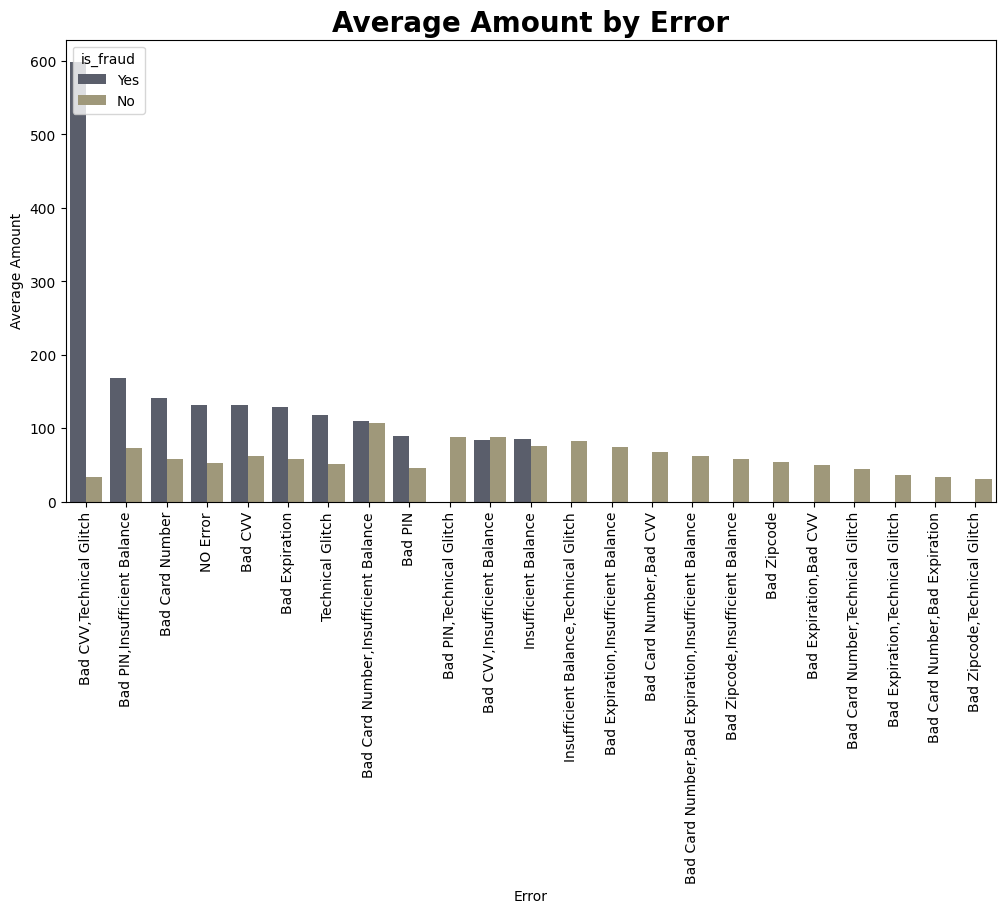

In [64]:
plt.figure(figsize=(12,6))
sns.barplot(x='errors',y='Avg',hue='is_fraud',data=errors_froud,palette='cividis')
plt.xticks(rotation=90)
plt.title('Average Amount by Error',fontsize=20,fontweight='bold')
plt.xlabel('Error')
plt.ylabel('Average Amount')
plt.show()

> # ***save cleanded data into csv file***

In [66]:
df.to_csv('Transaction_cleaned.csv',index=False)